# 第6章 決定木系回帰予測を行う10本ノック
## Iris版

## ノック51:決定木モデルを構築しよう


In [92]:
from sklearn.datasets import load_iris
import pandas as pd


# california = fetch_california_housing()
iris = load_iris()
#print(iris)
df = pd.DataFrame(iris.data,columns=[["sepal_length","sepal_width","petal_length","petal_width"]])
df_target = pd.DataFrame(iris.target,columns=[["target"]])
display(df.head(20))
display(df_target.head(60))
#print (iris)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [101]:
# X = df
# y = df_target

X = pd.concat([df[["sepal_length","sepal_width","petal_width"]],df_target], axis=1)
y = df[["petal_length"]]

display(X.head(60))
display(y.head())

,sepal_length,sepal_width,petal_width,target
0,5.1,3.5,0.2,0
1,4.9,3.0,0.2,0
2,4.7,3.2,0.2,0
3,4.6,3.1,0.2,0
4,5.0,3.6,0.2,0
5,5.4,3.9,0.4,0
6,4.6,3.4,0.3,0
7,5.0,3.4,0.2,0
8,4.4,2.9,0.2,0
9,4.9,3.1,0.1,0


,petal_length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4


In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

print(len(X_train))
display(X_train.head())
print(len(X_test))
display(X_test.head())

105


,sepal_length,sepal_width,petal_width,target
60,5.0,2.0,1.0,1
116,6.5,3.0,1.8,2
144,6.7,3.3,2.5,2
119,6.0,2.2,1.5,2
108,6.7,2.5,1.8,2


45


,sepal_length,sepal_width,petal_width,target
114,5.8,2.8,2.4,2
62,6.0,2.2,1.0,1
33,5.5,4.2,0.2,0
107,7.3,2.9,1.8,2
7,5.0,3.4,0.2,0


In [103]:
from sklearn.tree import DecisionTreeRegressor

#tree_reg = DecisionTreeRegressor(max_depth=3, random_state=0).fit(X_train,y_train)
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=0).fit(X_train,y_train)

[Text(0.5, 0.875, 'x[3] <= 0.5\nsquared_error = 3.225\nsamples = 105\nvalue = 3.829'),
 Text(0.25, 0.625, 'x[0] <= 4.55\nsquared_error = 0.02\nsamples = 34\nvalue = 1.453'),
 Text(0.125, 0.375, 'x[0] <= 4.35\nsquared_error = 0.008\nsamples = 4\nvalue = 1.25'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 1.1'),
 Text(0.1875, 0.125, 'squared_error = 0.0\nsamples = 3\nvalue = 1.3'),
 Text(0.375, 0.375, 'x[0] <= 5.75\nsquared_error = 0.016\nsamples = 30\nvalue = 1.48'),
 Text(0.3125, 0.125, 'squared_error = 0.013\nsamples = 29\nvalue = 1.49'),
 Text(0.4375, 0.125, 'squared_error = -0.0\nsamples = 1\nvalue = 1.2'),
 Text(0.75, 0.625, 'x[3] <= 1.5\nsquared_error = 0.764\nsamples = 71\nvalue = 4.966'),
 Text(0.625, 0.375, 'x[0] <= 5.85\nsquared_error = 0.234\nsamples = 32\nvalue = 4.197'),
 Text(0.5625, 0.125, 'squared_error = 0.132\nsamples = 18\nvalue = 3.867'),
 Text(0.6875, 0.125, 'squared_error = 0.045\nsamples = 14\nvalue = 4.621'),
 Text(0.875, 0.375, 'x[0] <= 7.0\n

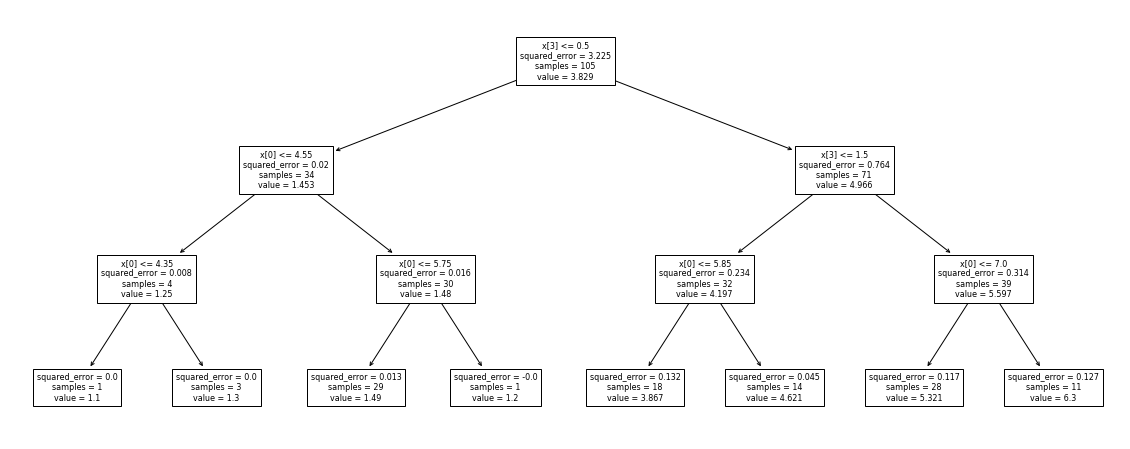

In [104]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,8))
tree.plot_tree(tree_reg,fontsize=8)

## ノック52:決定木モデルを評価しよう

In [105]:
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

import numpy as np

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

print(len(y_train_pred))
print(y_train_pred[:5])
print(len(y_test_pred))
print(y_test_pred[:5])

105
[[3.86666667]
 [5.32142857]
 [5.32142857]
 [5.32142857]
 [5.32142857]]
45
[[5.32142857]
 [4.62142857]
 [1.48965517]
 [6.3       ]
 [1.48965517]]


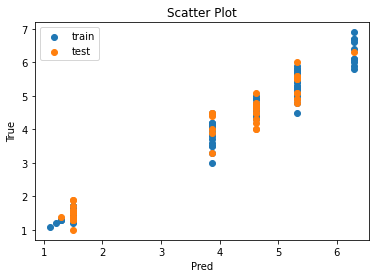

In [106]:
plt.scatter(y_train_pred, y_train, label="train")
plt.scatter(y_test_pred, y_test, label="test")
plt.xlabel("Pred")
plt.ylabel("True")
plt.title("Scatter Plot")
plt.legend()
plt.show()

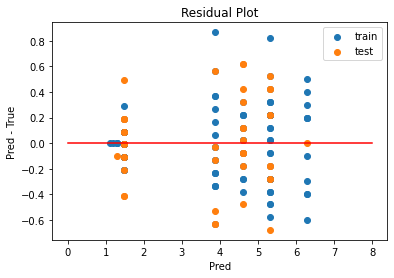

In [109]:
def residual_plot(y_train_pred, y_train, y_test_pred, y_test):
  plt.scatter(y_train_pred, y_train_pred - y_train, label="train")
  plt.scatter(y_test_pred, y_test_pred - y_test, label="test")
  plt.plot([0, 8], [0,0] ,color="red")
  plt.xlabel("Pred")
  plt.ylabel("Pred - True")
  plt.title("Residual Plot")
  plt.legend()
  plt.show()

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def get_eval_score(y_true,y_pred):

      mae = mean_absolute_error(y_true,y_pred)
      mse = mean_squared_error(y_true,y_pred)
      rmse = np.sqrt(mse)
      r2score = r2_score(y_true,y_pred)

      print(f"  MAE = {mae}")
      print(f"  MSE = {mse}")
      print(f"  RMSE = {rmse}")
      print(f"  R2 = {r2score}")

print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.2122996324966768
  MSE = 0.07692962702322309
  RMSE = 0.2773619062222191
  R2 = 0.9761493234704778
テストデータスコア
  MAE = 0.26192300675059293
  MSE = 0.11069730812129311
  RMSE = 0.33271204985887287
  R2 = 0.9597977623280322


## ノック53:決定木の深さを変えてみよう

In [111]:
tree_reg_depth_5 = DecisionTreeRegressor(max_depth=5, random_state=0).fit(X_train,y_train)
tree_reg_depth_10 = DecisionTreeRegressor(max_depth=10, random_state=0).fit(X_train,y_train)
tree_reg_depth_15 = DecisionTreeRegressor(max_depth=15, random_state=0).fit(X_train,y_train)

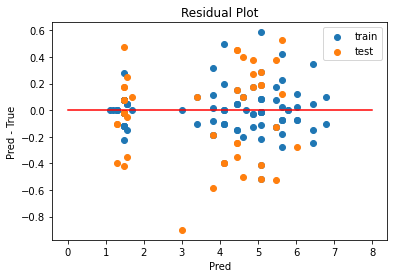

In [112]:
y_train_pred = tree_reg_depth_5.predict(X_train)
y_test_pred = tree_reg_depth_5.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [113]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.11338302277432709
  MSE = 0.026831400966183565
  RMSE = 0.16380293332594373
  R2 = 0.9916813964913002
テストデータスコア
  MAE = 0.28125764895330113
  MSE = 0.11337899192513243
  RMSE = 0.3367179708972071
  R2 = 0.95882384804346


In [114]:
tree_reg_depth_20 = DecisionTreeRegressor(max_depth=20, random_state=0).fit(X_train,y_train)

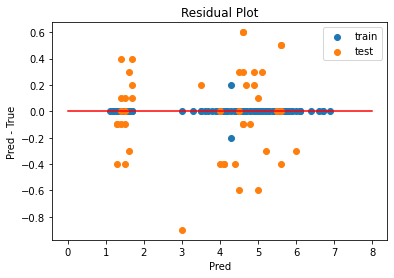

In [115]:
  y_train_pred = tree_reg_depth_20.predict(X_train)
  y_test_pred = tree_reg_depth_20.predict(X_test)

  y_train_pred = np.expand_dims(y_train_pred, 1)
  y_test_pred = np.expand_dims(y_test_pred, 1)

  residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [116]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.0038095238095238256
  MSE = 0.0007619047619047632
  RMSE = 0.027602622373694194
  R2 = 0.9997637848417359
テストデータスコア
  MAE = 0.27111111111111114
  MSE = 0.11511111111111108
  RMSE = 0.3392802839999859
  R2 = 0.9581947896826678


In [117]:
tree_reg_depth_100 = DecisionTreeRegressor(max_depth=100, random_state=0).fit(X_train,y_train)

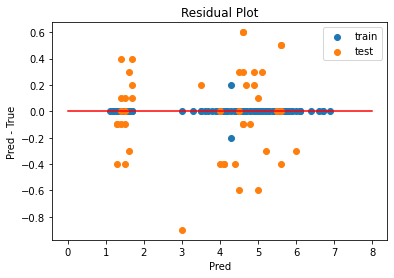

In [118]:
  y_train_pred = tree_reg_depth_100.predict(X_train)
  y_test_pred = tree_reg_depth_100.predict(X_test)

  y_train_pred = np.expand_dims(y_train_pred, 1)
  y_test_pred = np.expand_dims(y_test_pred, 1)

  residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [119]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.0038095238095238256
  MSE = 0.0007619047619047632
  RMSE = 0.027602622373694194
  R2 = 0.9997637848417359
テストデータスコア
  MAE = 0.27111111111111114
  MSE = 0.11511111111111108
  RMSE = 0.3392802839999859
  R2 = 0.9581947896826678


## ノック54:最小サンプル数を変えてみよう

In [120]:
tree_reg_samples_5 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5,random_state=0).fit(X_train,y_train)

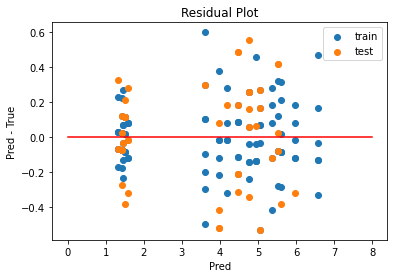

In [121]:
y_train_pred = tree_reg_samples_5.predict(X_train)
y_test_pred = tree_reg_samples_5.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [122]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.15085109599395313
  MSE = 0.03783522297808012
  RMSE = 0.19451278358524438
  R2 = 0.9882698551963586
テストデータスコア
  MAE = 0.24045855379188713
  MSE = 0.08365535343355453
  RMSE = 0.28923235198289027
  R2 = 0.9696186613898219


## ノック55:ランダムフォレストモデルの構築・評価をしよう

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=0).fit(X_train,y_train)

<ipython-input-44-9cd720708612>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=0).fit(X_train,y_train)


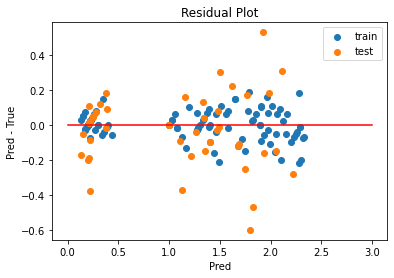

In [45]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [123]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.15085109599395313
  MSE = 0.03783522297808012
  RMSE = 0.19451278358524438
  R2 = 0.9882698551963586
テストデータスコア
  MAE = 0.24045855379188713
  MSE = 0.08365535343355453
  RMSE = 0.28923235198289027
  R2 = 0.9696186613898219


## ノック56:ランダムフォレストの決定木の数を変えてみよう

In [124]:
rf_change_param = RandomForestRegressor(n_estimators=3, max_depth=20, random_state=0).fit(X_train,y_train)

<ipython-input-124-ecd6c9edbd0e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_change_param = RandomForestRegressor(n_estimators=3, max_depth=20, random_state=0).fit(X_train,y_train)


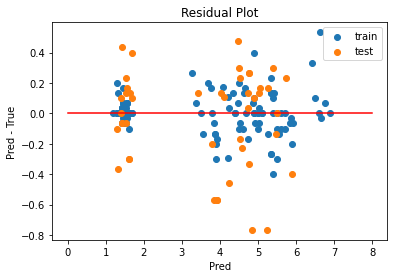

In [125]:
y_train_pred = rf_change_param.predict(X_train)
y_test_pred = rf_change_param.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [126]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.09339682539682544
  MSE = 0.019256296296296303
  RMSE = 0.13876705767687195
  R2 = 0.9940299243361604
テストデータスコア
  MAE = 0.2511111111111112
  MSE = 0.09747061728395065
  RMSE = 0.312202846373877
  R2 = 0.9646013350406932


## ノック57:交差検証法でモデルを評価しよう

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

rf_cv = RandomForestRegressor(n_estimators=3, max_depth=5, random_state=0)
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
rf_scores = cross_val_score(estimator=rf_cv, X=X, y=y, cv=k_fold, scoring="r2")

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

In [128]:
print(f"各分割のスコア：{rf_scores}")
print(f"平均スコア：{np.mean(rf_scores)}")

各分割のスコア：[0.96774142 0.95395952 0.97523657 0.98538825 0.97549723]
平均スコア：0.97156459951618


## ノック58:勾配ブースティング決定木モデルを構築・評価しよう

In [129]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(random_state=0)
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
xgb_scores = cross_val_score(xgb_reg, X, y, cv=k_fold, scoring="r2")

In [130]:
print(f"各分割のスコア：{xgb_scores}")
print(f"平均スコア：{np.mean(xgb_scores)}")

各分割のスコア：[0.96387978 0.94967633 0.98089597 0.98133165 0.97315052]
平均スコア：0.969786850223457


## ノック59:グリッドサーチでハイパーパラメータをチューニングしよう

In [131]:
xgb_reg_grid = xgb.XGBRegressor()

from sklearn.model_selection import GridSearchCV

params = {"booster": ["gbtree"],
            "n_estimators":[10,30,50,100],
            "max_depth":[2, 3, 4, 5, 6],
            "learning_rate":[0.1,0.25,0.5,0.75,1.0],
            "colsample_bytree":[0.1,0.25, 0,5, 0.75, 1.0],
            "random_state":[0]
            }

k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
grid = GridSearchCV(estimator=xgb_reg_grid,param_grid=params,cv=k_fold,scoring="r2")

In [132]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
500 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.8/dist-packages/xgboost/core.py", line 620, in inner_f
   

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'booster': ['gbtree'],
                         'colsample_bytree': [0.1, 0.25, 0, 5, 0.75, 1.0],
                         'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [10, 30, 50, 100],
                         'random_state': [0]},
             scoring='r2')

In [133]:
print(grid.best_params_)
print(grid.best_score_)

{'booster': 'gbtree', 'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 0}
0.9738417904043741


In [134]:
y_test_pred = grid.predict(X_test)
y_test_pred = np.expand_dims(y_test_pred, 1)

print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

テストデータスコア
  MAE = 0.21770801544189453
  MSE = 0.07824951655942122
  RMSE = 0.2797311504988696
  R2 = 0.9715819136361337


## ノック60:ランダムサーチでパラメータを調整しよう

In [137]:
xgb_reg_random = xgb.XGBRegressor()

from sklearn.model_selection import RandomizedSearchCV

params = {"booster": ["gbtree"],
            "n_estimators":[10,30,50,100],
            "max_depth":[2, 3, 4, 5, 6],
            "learning_rate":[0.1,0.25,0.5,0.75,1.0],
            "colsample_bytree":[0.1,0.25, 0,5, 0.75, 1.0],
            "random_state":[0]
            }


k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
random = RandomizedSearchCV(estimator=xgb_reg_random,param_distributions=params,scoring="r2",cv=k_fold,n_iter=30,random_state=0)

In [138]:
random.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.8/dist-packages/xgboost/core.py", line 620, in inner_f
    re

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=30,
                   param_distributions={'booster': ['gbtree'],
                                        'colsample_bytree': [0.1, 0.25, 0, 5,
                                                             0.75, 1.0],
                                        'learning_rate': [0.1, 0.25, 0.5, 0.75,
                                                          1.0],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 30, 50, 100],
                                        'random_state': [0]},
                   random_state=0, scoring='r2')

In [139]:
print(random.best_params_)
print(random.best_score_)

{'random_state': 0, 'n_estimators': 10, 'max_depth': 2, 'learning_rate': 1.0, 'colsample_bytree': 0.75, 'booster': 'gbtree'}
0.9715647782220138


In [140]:
y_test_pred = random.predict(X_test)
y_test_pred = np.expand_dims(y_test_pred, 1)

print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

テストデータスコア
  MAE = 0.27086138301425505
  MSE = 0.10675717010427041
  RMSE = 0.3267371575200323
  R2 = 0.9612287127974612
